### **Trabalho 2**
**Grupo:**

Alunos:
- Gustavo Dias
- Jéssica Diniz
- Letícia Bussinger
- Pedro Longue 
- Thiago Bastos

**Questão 1:**  Considerando o conjunto dados, responda as questões abaixo considerando o
modelo de regressão linear multivariado:

Primeiramente, Iremos considerar os seguintes dados que se referem ao menor, maior e o volume do café.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('coffee.csv', sep=",")

x_High=np.array(df['High'])
x_Low = np.array(df['Low'])
y_Volume = np.array(df['Volume'])

pd.DataFrame(df,columns=['High','Low', 'Volume'])

,High,Low,Volume
0,124.00,116.10,6640
1,120.50,115.75,5492
2,121.00,115.00,6165
3,121.40,116.50,5094
4,117.75,113.80,6855
...,...,...,...
5741,240.55,240.55,1
5742,241.75,238.75,14
5743,240.75,239.65,12
5744,238.55,236.60,6


#### a) Faça o gráfico de dispersão bidimensional (XY) entre a variável y e cada uma das variáveis regressoras X1,..., Xp (p gráficos separados).

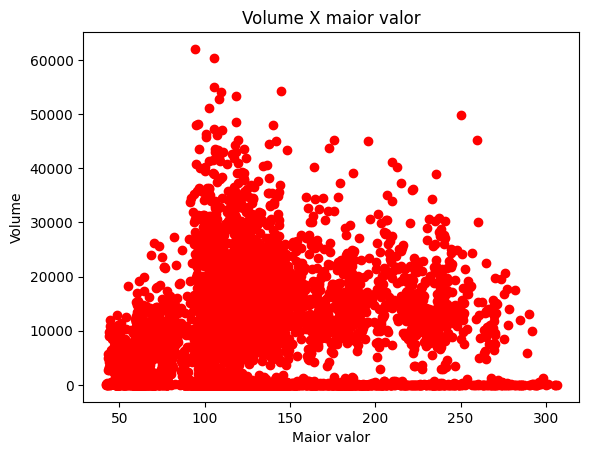

In [28]:
plt.title("Volume X maior valor")
plt.xlabel("Maior valor")
plt.ylabel("Volume")
plt.plot(x_High,y_Volume, "o", color='red')

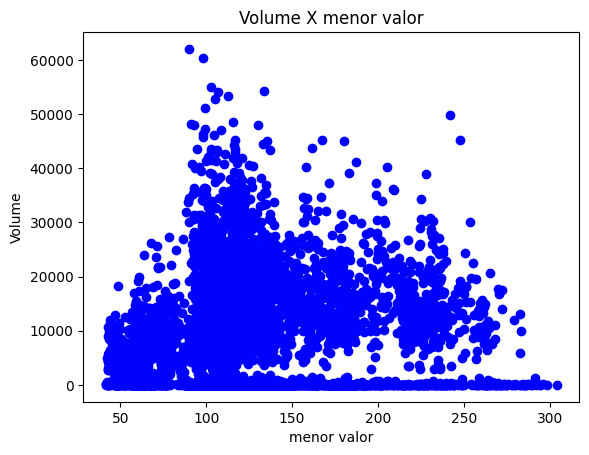

In [29]:
plt.title("Volume X menor valor")
plt.xlabel("menor valor")
plt.ylabel("Volume")
plt.plot(x_Low,y_Volume, "o", color='blue')

#### b) Estime a correlação entre a variável Y e cada uma das variáveis regressoras (ρ(Y,Xi)). Comente.

In [38]:
N_volume = len(y_Volume)
print("Número de pontos:", N_volume, "\n")

somatorioXHigh = 0.0 
somatorioYvolume = 0.0 
somatorioXiHighXmedioHighYiYmedioVolume = 0.0 
somatorioXiHighXmedioHigh2 = 0.0 
somatorioYiYmedioVolume2 = 0.0 

for i in range(N_volume):
    somatorioXHigh += x_High[i]
    somatorioYvolume += y_Volume[i]
    
x_medioPrice = somatorioXHigh/N_volume
y_medio = somatorioYvolume/N_volume


for i in range(N_volume):
    somatorioXiHighXmedioHighYiYmedioVolume += (x_High[i]-x_medioPrice)*(y_Volume[i]-y_medio)
    somatorioXiHighXmedioHigh2 += (x_High[i] - x_medioPrice)**2
    somatorioYiYmedioVolume2 += (y_Volume[i]-y_medio)**2

  
coefCorrelacaoHigh = (somatorioXiHighXmedioHighYiYmedioVolume)/np.sqrt(somatorioXiHighXmedioHigh2*somatorioYiYmedioVolume2)
print("Coeficiente de Correlação de Y com X_High: ", coefCorrelacaoHigh)


Número de pontos: 5746 

Coeficiente de Correlação de Y com X_High:  0.12076815384626614


In [31]:
somatorioXLow = 0.0 
somatorioYvolume = 0.0
somatorioXiLowXmedioLowYiYmedioVolume = 0.0 
somatorioXiLowXmedioLow2 = 0.0 
somatorioYiYmedioVolume2 = 0.0 

for i in range(N_volume):
    somatorioXLow += x_Low[i]
    somatorioYvolume += y_Volume[i]
    
x_medioBags = somatorioXLow/N_volume
y_medio = somatorioYvolume/N_volume


for i in range(N_volume):
    somatorioXiLowXmedioLowYiYmedioVolume += (x_Low[i]-x_medioBags)*(y_Volume[i]-y_medio)
    somatorioXiLowXmedioLow2 += (x_Low[i] - x_medioBags)**2
    somatorioYiYmedioVolume2 += (y_Volume[i]-y_medio)**2
  
coefCorrelacaoLow = (somatorioXiLowXmedioLowYiYmedioVolume)/np.sqrt(somatorioXiLowXmedioLow2*somatorioYiYmedioVolume2)
print("Coeficiente de Correlação de Y com x_Low: ", coefCorrelacaoLow)

Coeficiente de Correlação de Y com x_Low:  0.10449010818356445


Com base nos conceitos de coeficiente de correlação, pode-se inferir que seu valor deve estar entre -1 e 1, em que quanto mais próximos das extremidades a relação entre as variáveis é forte, sendo negativamente perto de -1 e positivamente perto de 1 e quanto mais perto de 0, a relação é fraca, assim, inexistente. 

Podemos concluir que o coeficiente de correlação em relação a variável regressora referente ao maior valor do café e o volume se aproximam mais de zero, ao invés de um, portanto, existe um grau fraco de correlação entre as variáveis e linear positiva.

Também podemos concluir que o coeficiente de correlação em relação a variável regressora referente ao menor valor do café e o volume se aproximam mais de zero, logo, existe um grau fraco de correlação entre as variáveis e linear positiva.

Dessa forma, a variável regressora que melhor se correlaciona com a variável em análise é a variável referente ao maior valor do café.



#### c) Calcule o coeficiente de determinação $R^{2}$(Y,Xi) entre a variável Y e cada uma das variáveis regressoras. Comente o resultado.

In [32]:
R2High = coefCorrelacaoHigh**2
print("Coeficiente de determinação do Maior valor: ", R2High)

R2Low = coefCorrelacaoLow**2
print("Coeficiente de determinação do Menor valor: ", R2Low)

Coeficiente de determinação do Maior valor:  0.014584946983435407
Coeficiente de determinação do Menor valor:  0.010918182708213002


Com base nos conceitos do coeficiente de determinação $R^{2}$ tal valor indica, em porcentagem, a variação de y em relação a cada variável regressora, através do modelo linear estimado.
Dessa forma, com os resultados determinados concluimos que a varável y (volume) é explicada cerca de 1% pela variável regressora referente ao menor valor e cerca de 1,5% pela variável regressora referente ao maior valor. Logo, é mais fácil estimar o comportamento do volume a partir do comportamento da variável que determina o maior valor.

#### d) Encontre o hiperplano de quadrados mínimos (estime β0, β1, ..., βp).

In [33]:
linhas = len(y_Volume)

vec_X = np.array([np.array(x_High), np.array(x_Low)])

colunas = (len(vec_X) + 1)

X = np.ones((linhas, colunas)) 

for i in range(linhas):
    for j in range(colunas):  
        if j!=0 : 
            X[i][j] = vec_X[j-1][i] 
            
x_t = X.T 
x_tx = np.dot(x_t,X) 
x_txI = np.linalg.inv(x_tx)
A = np.dot(x_txI, x_t) 
y_array = np.array([y_Volume]) 
Y = y_array.T 
beta = np.dot(A,Y) 

Beta = np.dot(A,y_Volume) 
for i in range(len(Beta)):
    print("β",i, ":", Beta[i])
    
print("O hiperplano de melhor ajuste é: y=", Beta[0], "+ (", Beta[1],")*x1 + (" ,Beta[2] ,")*x2")

β 0 : 6518.715320173036
β 1 : 1765.8224146741438
β 2 : -1790.6197878890225
O hiperplano de melhor ajuste é: y= 6518.715320173036 + ( 1765.8224146741438 )*x1 + ( -1790.6197878890225 )*x2


#### e) Calcule os valores estimados de y (ou seja, ŷ) através do hiperplano estimado no item anterior.

In [34]:
SomatorioYChapeu = 0.0
y_chapeu=[]


for i in range(N_volume):
    SomatorioYChapeu += Beta[0] + Beta[1]*x_High[i] + Beta[2]*x_Low[i]
    y_chapeu.append(Beta[0] + Beta[1]*x_High[i] + Beta[2]*x_Low[i])
    
print("y^:", SomatorioYChapeu)
print(somatorioYvolume)
pd.DataFrame({'y^': y_chapeu})

y^: 50606049.99999136
50606050.0


,y^
0,17589.737366
1,12036.075840
2,14261.951889
3,12282.351173
4,10671.772786
...,...
5741,553.707193
5742,5895.809709
5743,2518.429485
5744,4095.010526


#### f) Calcule os resíduos, ou seja, o erro de estimação y-ŷ.

In [35]:
somatorioResiduos = 0.0

e=[]
for i in range(N_volume):
    e.append(y_Volume[i] - y_chapeu[i])
    somatorioResiduos += e[i]
    
pd.DataFrame({'y^': y_chapeu,'e': e})

,y^,e
0,17589.737366,-10949.737366
1,12036.075840,-6544.075840
2,14261.951889,-8096.951889
3,12282.351173,-7188.351173
4,10671.772786,-3816.772786
...,...,...
5741,553.707193,-552.707193
5742,5895.809709,-5881.809709
5743,2518.429485,-2506.429485
5744,4095.010526,-4089.010526


In [36]:
print("Somatorio dos Resíduos:", somatorioResiduos)

Somatorio dos Resíduos: 8.680101018399e-06


#### g) Faça o histograma dos erros de estimação encontrados no item anterior. Comente sobre sua característica.

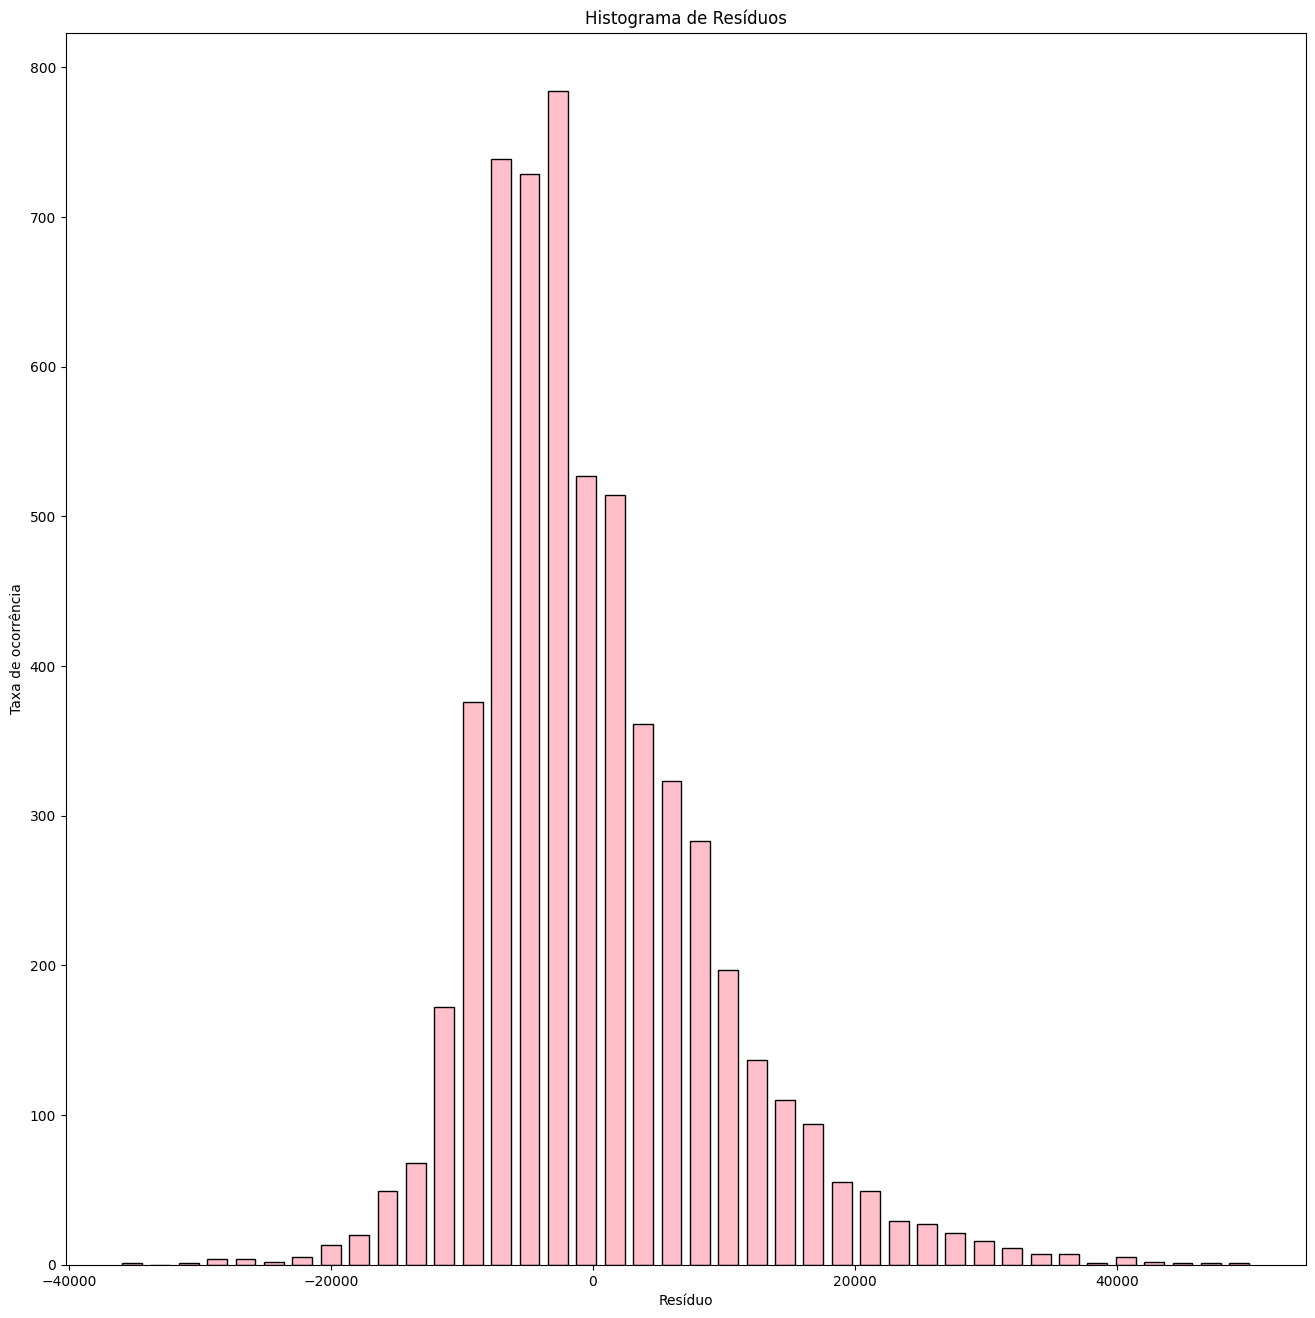

In [37]:
plt.figure(figsize=(16,16))
plt.title("Histograma de Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Taxa de ocorrência")
plt.hist(e,bins = 40, ec = "k",rwidth=0.7,color = "pink")
plt.show()

Podemos perceber pelo histograma a recorrência de alguns pontos influentes que se encontram entre -30000 e 50000. Além disso, pode-se considerar que os resíduos apresentam uma alta dispersão, pois  se encontram na faixa de -20000 a 30000, destarte, pode-se concluir que esse modelo apresenta um erro relativamente alto.